<a href="https://colab.research.google.com/github/Swathi014/22ITCS100-Advanced-Machine-Learning/blob/main/Comparing_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

# save "bunch" object containing iris dataset and its attributes
iris = load_iris()

# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

In [2]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
classes = {0:'setosa',1:'versicolor',2:'virginica'}

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(105, 4) (45, 4) (105,) (45,)


In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = "liblinear")
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [9]:
y_pred_lr = logreg.predict(X_test)

In [10]:
from sklearn import metrics
acc_lr = metrics.accuracy_score(y_test, y_pred_lr)
print(acc_lr)
print('Accuracy: %.3f' % acc_lr)

0.9777777777777777
Accuracy: 0.978


In [11]:
# Print (1) Confusion Matrix for Logistic Regression Model:
import pandas as pd
from IPython.display import display
confusion_mat = pd.crosstab(y_test, y_pred_lr, rownames=['Actual'], colnames=['Predicted'])
display(confusion_mat)

Predicted,0,1,2
Actual,,,
0,15,0,0
1,0,14,1
2,0,0,15


In [12]:
# Print (2) Classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_lr, labels=None, target_names=None)
print('Classification report:\n',cr)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [13]:
X_new = [[3, 2, 1, 0.2], [4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.9], [3, 5, 4, 2]]
y_predict = logreg.predict(X_new)
print(classes[y_predict[0]])
print(classes[y_predict[1]])
print(classes[y_predict[2]])
print(classes[y_predict[3]])

setosa
versicolor
virginica
virginica


In [14]:
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,26)
scores = {}
score_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_pred_knn = knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test, y_pred_knn)
  score_list.append(metrics.accuracy_score(y_test, y_pred_knn))

Text(0, 0.5, 'Accuracy')

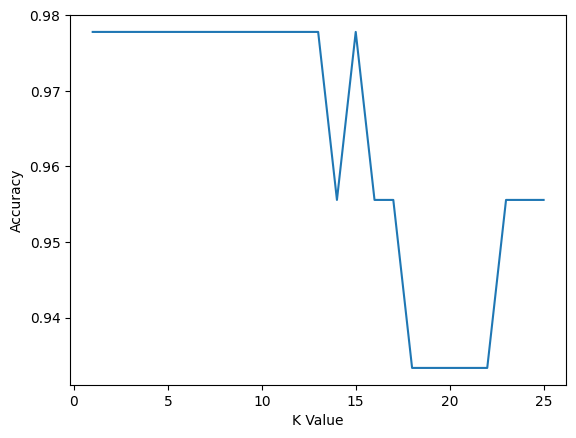

In [15]:
import matplotlib.pyplot as plt
plt.plot(k_range,score_list)
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [16]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
print('Accuracy: %.3f %%' % acc_knn)

Accuracy: 0.978 %


In [17]:
confusion_mat = pd.crosstab(y_test, y_pred_knn, rownames=['Actual'], colnames=['Predicted'])
display(confusion_mat)

Predicted,0,1,2
Actual,,,
0,15,0,0
1,0,15,0
2,0,1,14


In [18]:
cr = classification_report(y_test, y_pred_knn, labels=None, target_names=None)
print('Classification report:\n',cr)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [19]:
X_new = [[3, 2, 1, 0.2], [4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.9], [3, 5, 4, 2]]
y_predict = knn.predict(X_new)
print(classes[y_predict[0]])
print(classes[y_predict[1]])
print(classes[y_predict[2]])
print(classes[y_predict[3]])

setosa
versicolor
versicolor
versicolor


In [20]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = metrics.accuracy_score(y_test, y_pred_svm)
print('Accuracy: %.3f %%' % acc_svm)

Accuracy: 0.978 %


In [21]:
confusion_mat = pd.crosstab(y_test, y_pred_svm, rownames=['Actual'], colnames=['Predicted'])
display(confusion_mat)

Predicted,0,1,2
Actual,,,
0,15,0,0
1,0,15,0
2,0,1,14


In [22]:
cr = classification_report(y_test, y_pred_svm, labels=None, target_names=None)
print('Classification report:\n',cr)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [23]:
X_new = [[3, 2, 1, 0.2], [4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.9], [3, 5, 4, 2]]
y_predict = svm.predict(X_new)
print(classes[y_predict[0]])
print(classes[y_predict[1]])
print(classes[y_predict[2]])
print(classes[y_predict[3]])

setosa
versicolor
versicolor
versicolor
